In [114]:
# DataFrame
import pandas as pd
import math
import numpy as np

# Veri Görselleştirme
import matplotlib.pyplot as plt
import seaborn as sns

# Model #1
from sklearn.ensemble import RandomForestClassifier

# Model #2
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers.core import Dense
from keras.layers import LSTM

# Model Skoru
from sklearn.metrics import precision_score

In [115]:
df = pd.read_csv("TUPRS.csv")
df.head()

,Date,Now,Opening,High,Low,Hac.,Fark %
0,3/1/2024,164.8,162.2,165.5,161.4,23.88,1.85%
1,2/29/2024,161.8,162.2,164.4,159.7,21.88,0.19%
2,2/28/2024,161.5,160.3,164.4,158.8,26.61,0.81%
3,2/27/2024,160.2,160.7,163.1,160.1,25.32,-0.25%
4,2/26/2024,160.6,164.5,165.2,160.5,22.70,-2.13%


In [116]:
print("Date kolonunun dtype'ı:",df["Date"].dtype) 

# Tipi object Datetime'a çevirelim ki feature engineering de işimiz kolaylaşsın.
df = df.set_index('Date')
df.index = pd.to_datetime(df.index)
print("yeni dtype:",df.index.dtype) 

Date kolonunun dtype'ı: object
yeni dtype: datetime64[ns]


In [117]:
print("eski:",df.columns)
# Bazı kolonların başında ve sonunda boşluk var bunları düzeltelim.
df.columns = df.columns.str.strip()
print("yeni:",df.columns)

# Fark kolonundaki % işaretini silelim.
df["Fark %"] = df["Fark %"].str.replace(r'%', '', regex=True)
df.head()


eski: Index([' Now ', ' Opening ', ' High ', ' Low ', ' Hac. ', 'Fark %'], dtype='object')
yeni: Index(['Now', 'Opening', 'High', 'Low', 'Hac.', 'Fark %'], dtype='object')


,Now,Opening,High,Low,Hac.,Fark %
Date,,,,,,
2024-03-01,164.8,162.2,165.5,161.4,23.88,1.85
2024-02-29,161.8,162.2,164.4,159.7,21.88,0.19
2024-02-28,161.5,160.3,164.4,158.8,26.61,0.81
2024-02-27,160.2,160.7,163.1,160.1,25.32,-0.25
2024-02-26,160.6,164.5,165.2,160.5,22.70,-2.13


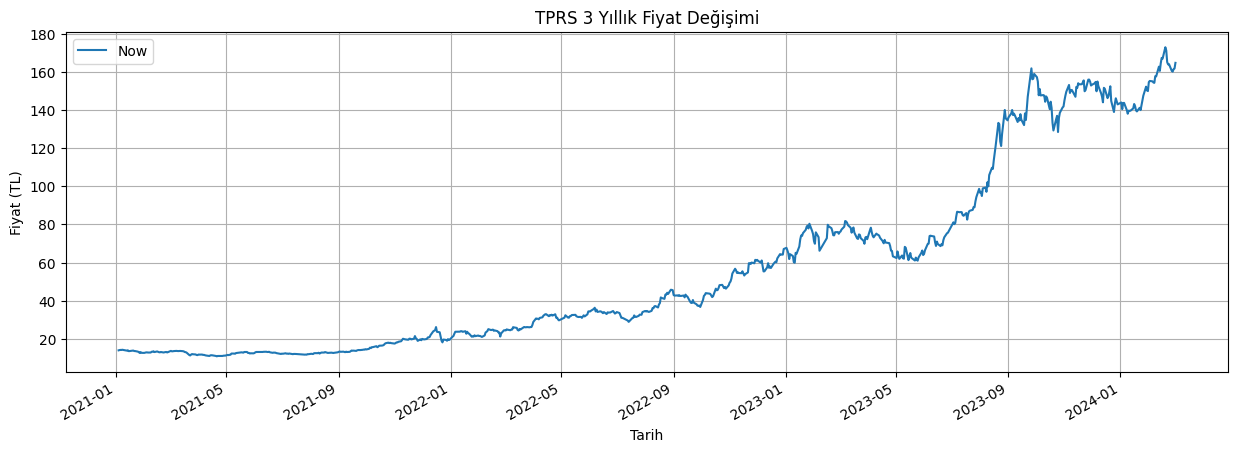

In [118]:
# Dataya genel bir bakış:
df.plot(y="Now",figsize = (15,5),title="TPRS 3 Yıllık Fiyat Değişimi")
plt.ylabel("Fiyat (TL)")
plt.xlabel("Tarih")
plt.grid()
plt.show()

In [119]:
# modelin tahmin etmesi için artma/azalma'ya göre ayrı bir kolon açalım:
df["Fark %"] = df["Fark %"].astype(float)
df["Target"] = (df["Fark %"] > 0).astype(int)
df.head()

,Now,Opening,High,Low,Hac.,Fark %,Target
Date,,,,,,,
2024-03-01,164.8,162.2,165.5,161.4,23.88,1.85,1
2024-02-29,161.8,162.2,164.4,159.7,21.88,0.19,1
2024-02-28,161.5,160.3,164.4,158.8,26.61,0.81,1
2024-02-27,160.2,160.7,163.1,160.1,25.32,-0.25,0
2024-02-26,160.6,164.5,165.2,160.5,22.70,-2.13,0


In [120]:
# MODEL #1:

model = RandomForestClassifier(n_estimators=100,min_samples_split=100,random_state=1)

train1 = df.iloc[:-100]
test1 = df.iloc[-100:]

parametreler = ['Now', 'Opening', 'High', 'Low', 'Hac.']

model.fit(train1[parametreler],train1["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [121]:
model1_tahminler = model.predict(test1[parametreler]) #numpy array veriyor
model1_tahminler = pd.Series(model1_tahminler,index=test1.index) #pandas series'e çevirdim
precision_score(test1["Target"],model1_tahminler)

0.6511627906976745

<AxesSubplot:xlabel='Date'>

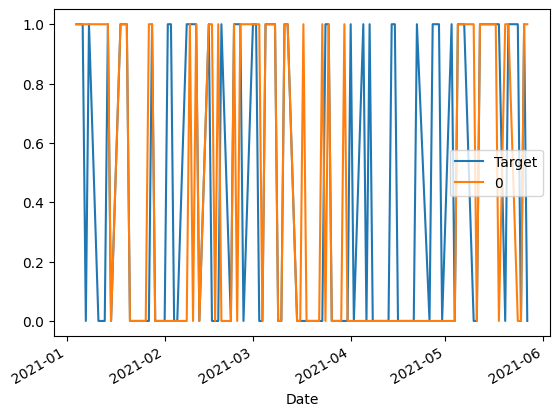

In [122]:
pd.concat([test1["Target"],model1_tahminler],axis=1).plot()

In [123]:
# MODEL #2:

Bu modelde sondaki 100 kadar test verisini baştaki 600 kadar train datasıyla tahmin etmek yerine tahmin edeceğim günden son 50 günkü fiyatı kullanarak modeli eğiteceğim ve tahmini de benzer şekilde yapacağım. 

In [124]:
model2_data = df.drop(['Opening', 'High', 'Low', 'Hac.', 'Fark %',"Target"],axis=1)
scaler = MinMaxScaler(feature_range=(0,1))
model2_data = scaler.fit_transform(model2_data)
model2_data

array([[9.49457594e-01],
       [9.30966469e-01],
       [9.29117357e-01],
       [9.21104536e-01],
       [9.23570020e-01],
       [9.45142998e-01],
       [9.44526627e-01],
       [9.51923077e-01],
       [9.89521696e-01],
       [1.00000000e+00],
       [9.63017751e-01],
       [9.65483235e-01],
       [9.48224852e-01],
       [9.23570020e-01],
       [9.37130178e-01],
       [9.05695266e-01],
       [9.06311637e-01],
       [8.84738659e-01],
       [8.85971400e-01],
       [8.89669625e-01],
       [8.90902367e-01],
       [8.87204142e-01],
       [8.58234714e-01],
       [8.60083826e-01],
       [8.72411243e-01],
       [8.43441815e-01],
       [8.26183432e-01],
       [8.12006903e-01],
       [7.96597633e-01],
       [8.03994083e-01],
       [7.92283037e-01],
       [7.95981262e-01],
       [8.09541420e-01],
       [8.16321499e-01],
       [8.02144970e-01],
       [7.94748521e-01],
       [7.94132150e-01],
       [7.94748521e-01],
       [7.84886588e-01],
       [7.96597633e-01],


In [125]:
len(model2_data)

793

In [126]:
# Train ve Test Dataları:
X_train2 = []
y_train2 = []
X_test2 = []
y_test2 = []

for i in range(30,733): # len(model2_data) = 793
    y_train2.append(model2_data[i-30])
    X_train2.append(model2_data[i-30:i])

for i in range(733,763):
    X_test2.append(model2_data[i-30:i])
    y_test2.append(model2_data[i])


In [132]:
# List olan setleri numpy arraye çevirme:
X_train2, y_train2 = np.array(X_train2), np.array(y_train2)
X_test2, y_test2 = np.array(X_test2), np.array(y_test2)

X_test2.shape

(30, 30, 1)

In [128]:
# Model
model2 = Sequential()
model2.add(LSTM(50,return_sequences=True, input_shape = (X_train2.shape[1],1)))
model2.add(LSTM(50,return_sequences=False))
model2.add(Dense(25))
model2.add(Dense(1))

In [129]:
model2.compile(optimizer="adam",loss="mean_squared_error")
model2.fit(X_train2,y_train2,batch_size=1,epochs=1)

703/703 [==============================] - 16s 15ms/step - loss: 0.0062


In [135]:
model2_tahminler = model2.predict(X_test2)
model2_tahminler = scaler.inverse_transform(model2_tahminler)*10
model2_tahminler

1/1 [==============================] - 0s 52ms/step


array([[132.85445],
       [133.13094],
       [133.46503],
       [133.79305],
       [133.98576],
       [134.1276 ],
       [134.51619],
       [135.15826],
       [135.98613],
       [137.01463],
       [138.19128],
       [139.47516],
       [140.79529],
       [142.10733],
       [143.3772 ],
       [144.59872],
       [145.72717],
       [146.7402 ],
       [147.64563],
       [148.51256],
       [149.26839],
       [149.78014],
       [150.14635],
       [150.38995],
       [150.52   ],
       [150.53117],
       [150.51918],
       [150.45267],
       [150.37596],
       [150.32872]], dtype=float32)